# Ohmic Contacts regrowth

La tecnica es muy tipica en la familia III-N (en especial, dispositivos GaN/AlGaN) y un poco menos comun pero tambien existente en la familia III-V siendo el GaAs, AlInAs e InGaAs casos particulares donde se utiliza.

Algunas referencias:

* Regrowth of a GaAs layer for n-GaAs ohmic contacts; Li, Baoqi; Holloway, Paul H., Journal of Applied Physics, Volume 71, Issue 9, May 1, 1992, pp.4385-4389 , DOI:10.1063/1.350776

* In0.53Ga0.47AsChannelMOSFETsWith Self-AlignedInAsSource/Drain Formed by MEE Regrowth, Uttam Singisetti et. al., IEEE Electron Device Letters ( Volume: 30 , Issue: 11 , Nov. 2009 ), 
DOI: 10.1109/LED.2009.2031304 

* MBE-Regrown Ohmics in InAlN HEMTs With a Regrowth Interface Resistance of 0.05Ω⋅mm, Jia Guo et. al,  IEEE Electron Device Letters ( Volume: 33 , Issue: 4 , April 2012 ) ,  DOI: 10.1109/LED.2012.2186116 

* AlGaN/GaN MODFETs with low ohmic contact resistances by source/drain n/sup +/ re-growth, Y.-F. Wu et. al.,  Compound Semiconductors 1997. Proceedings of the IEEE Twenty-Fourth International Symposium on Compound Semiconductors,  DOI: 10.1109/ISCS.1998.711683 

# Specific Contact Resistivity ($\rho _i$)

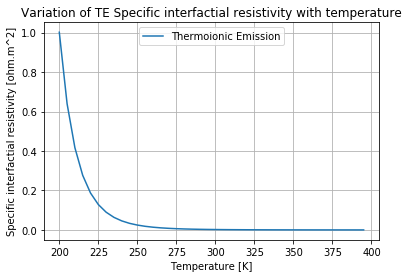

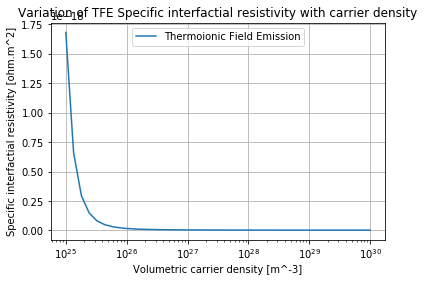

/home/andres/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:90: RuntimeWarning: overflow encountered in exp


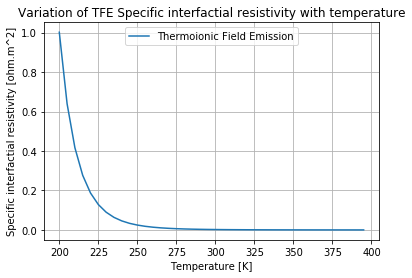

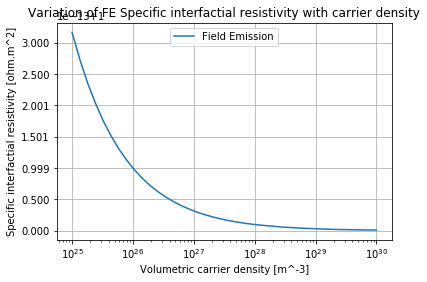

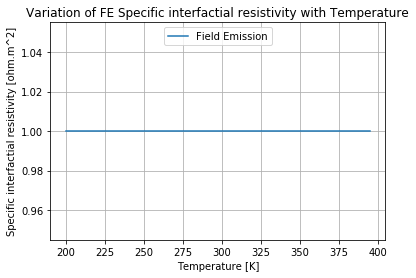

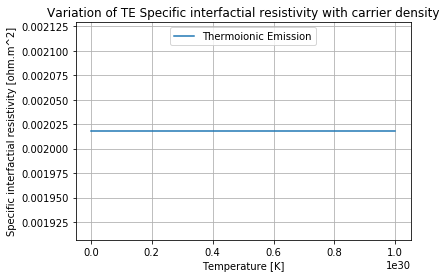

In [20]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue May  7 09:06:45 2019

@author: andres
"""

import numpy as np
import scipy.constants
import matplotlib.pyplot as plt
import scipy

phi_b = 0.3 #Schottky barrier potential in volt

kB,_,_ = scipy.constants.physical_constants["Boltzmann constant"]
kBeV,_,_ = scipy.constants.physical_constants["Boltzmann constant in eV/K"]
me,_,_= scipy.constants.physical_constants["electron mass"]
h,_,_= scipy.constants.physical_constants["Planck constant"]
q,_,_= scipy.constants.physical_constants["elementary charge"]
eps0 = scipy.constants.epsilon_0


T_start=200
T_stop=400
T_step=5

V=1

meeff=0.13*me 

A=120*meeff/me;
#J=A*T*T*np.exp(-phi_b*1/(kBeV*T))*(np.exp((q*V)/(kB*T)) - 1) #"1" stands for single electron charge

T=np.arange(T_start,T_stop,T_step)
T0=(T_start+T_stop)/2

pho_1=kB/(q*A*T)
pho_i_TE=pho_1*np.exp((1*phi_b)/(kBeV*T)) #"1" stands for single electron charge


plt.figure()
plt.plot(T,pho_i_TE,label='Thermoionic Emission')
plt.grid(True)
plt.xlabel('Temperature [K]')
plt.ylabel('Specific interfactial resistivity [ohm.m^2]')
plt.title('Variation of TE Specific interfactial resistivity with temperature')
plt.legend(loc='upper center')
plt.show()


C1=1e-13

N_start=25
N_stop=30
Ks=8.9 # Low frequency dielectric constant for GaN

pho_1_0=kB/(q*A*T0)

mtun=0.2*me #Tunneling effective mass for GaN

N=np.logspace(N_start, N_stop, num=40)

E00 = ((q*h)/(4*np.pi))*np.sqrt(N/(Ks*eps0*mtun))

E0 = E00/(np.tanh(E00/kB*T0))

pho_i_TFE=C1*pho_1_0*np.exp((q*phi_b)/(E0)) #"1" stands for single electron charge

plt.figure()
plt.semilogx(N,pho_i_TFE,label='Thermoionic Field Emission')
plt.grid(True)
plt.xlabel('Volumetric carrier density [m^-3]')
plt.ylabel('Specific interfactial resistivity [ohm.m^2]')
plt.title('Variation of TFE Specific interfactial resistivity with carrier density')
plt.legend(loc='upper center')
plt.show()



#%%
C1=1e-13

N0=1e27

E00 = ((q*h)/(4*np.pi))*np.sqrt(N0/(Ks*eps0*mtun))

E0 = E00/ (np.tanh(E00/kB*T))

pho_i_TFE=C1*pho_1*np.exp((1*phi_b)/(E0)) #"1" stands for single electron charge


plt.figure()
plt.plot(T,pho_i_TE,label='Thermoionic Field Emission')
plt.grid(True)
plt.xlabel('Temperature [K]')
plt.ylabel('Specific interfactial resistivity [ohm.m^2]')
plt.title('Variation of TFE Specific interfactial resistivity with temperature')
plt.legend(loc='upper center')
plt.show()

#%%

C3=1

N_start=25
N_stop=30
Ks=8.9 # Low frequency dielectric constant for GaN

pho_1_0=kB/(q*A*T0)

mtun=0.2*me #Tunneling effective mass for GaN

N=np.logspace(N_start, N_stop, num=40)

E00 = ((q*h)/(4*np.pi))*np.sqrt(N/(Ks*eps0*mtun))

E0 = E00/(np.tanh(E00/kB*T0))

pho_i_FE=np.exp(C3/np.sqrt(N))

plt.figure()
plt.semilogx(N,pho_i_FE,label='Field Emission')
plt.grid(True)
plt.xlabel('Volumetric carrier density [m^-3]')
plt.ylabel('Specific interfactial resistivity [ohm.m^2]')
plt.title('Variation of FE Specific interfactial resistivity with carrier density')
plt.legend(loc='upper center')
plt.show()

#%%

pho_i_FE=np.exp(C3/np.sqrt(N0))*np.ones(len(T))

plt.figure()
plt.plot(T,pho_i_FE,label='Field Emission')
plt.grid(True)
plt.xlabel('Temperature [K]')
plt.ylabel('Specific interfactial resistivity [ohm.m^2]')
plt.title('Variation of FE Specific interfactial resistivity with Temperature')
plt.legend(loc='upper center')
plt.show()


#%%

N_start=25
N_stop=30
Ks=8.9 # Low frequency dielectric constant for GaN
pho_i_TE=pho_1_0*np.exp((1*phi_b)/(kBeV*T0))*np.ones(len(N))
N=np.logspace(N_start, N_stop, num=40)
pho_1_0=kB/(q*A*T0)


plt.figure()
plt.plot(N,pho_i_TE,label='Thermoionic Emission')
plt.grid(True)
plt.xlabel('Temperature [K]')
plt.ylabel('Specific interfactial resistivity [ohm.m^2]')
plt.title('Variation of TE Specific interfactial resistivity with carrier density')
plt.legend(loc='upper center')
plt.show()




# Publicaciones state of art sobre TLM / CTLM


* Matrix-Free Nonlinear Finite-Element Solver Using Transmission-Line Modeling on GPU,  IEEE Transactions on Magnetics ( Early Access ), Page(s): 1 - 5, 21 March 2019, DOI: 10.1109/TMAG.2019.2903008

In this paper, a matrix-free TLM scheme is proposed to make use of the solved nonlinear reluctivities without employing any matrices at each timestep, thus substantially decreasing the number of required TLM iterations. A speedup of more than 27 times is obtained compared with a commercial FE package for different problem sizes while maintaining high accuracy.

* Understanding Transport in Heterojunction Contact Stacks by Simulating Silicon Heterojunction TLM Structures, Pradyumna Muralidharan et. al.,  2018 IEEE 7th World Conference on Photovoltaic Energy Conversion (WCPEC) (A Joint Conference of 45th IEEE PVSC, 28th PVSEC & 34th EU PVSEC), DOI: 10.1109/PVSC.2018.8548166 

* The correlation transmission line matrix (CTLM) method,  2017 International Conference on Electromagnetics in Advanced Applications (ICEAA),  DOI: 10.1109/ICEAA.2017.8065569 

Modeling of field propagation for noisy electromagnetic (EM) fields requires consideration of auto- and cross-correlation field spectral densities. The correlation transmission line matrix (CTLM) method is an extension of the TLM method allowing for the time-domain modeling of stochastic EM fields. In this contribution, the CTLM method is treated, and its application in combination with established full-wave solvers, and a numerical study is presented.

* Circular Cross Kelvin Resistor test structure for low specific contact resistivity, Stanley Luong et. al., SoutheastCon 2017,  DOI: 10.1109/SECON.2017.7925402 

In determining the specific contact resistance of an Ohmic contact, using conventional Cross Kelvin Resistor (CKR) test structures, the errors in doing so occur from parasitic resistances around the contact. These parasitic resistances are difficult to determine because no convenient analytical expression is available to calculate this resistance. However, electrical current entering a circular contact uniformly from all directions can be modeled using analytical expressions. Here we present a new test structure where parasitic resistance can easily be calculated because it occurs between concentric equipotentials. This resistance is then subtracted from the total resistance to give the resistance due to the contact interface and hence the specific contact resistance of that interface. Using aspects of the CKR and the Circular Transmission Line Model (CTLM) we have designed a new test structure, here called the Circular Cross Kelvin Resistor (CCKR) test structure for determining specific contact resistance.

# FET

## MESFET

Los MESFET se pueden lograr con compuestos III-V, siendo GaAs el caso más paradigmático.
También existen para compuestos III-N, siendo GaN un caso particular.

También se pueden lograr MESFETs en SiC. Y también se han fabricado utilizando tecnología CMOS sobre SOI.

Van Tuyl, R. and Liechti, C.A. (1974), Gallium arsenide digital integrated circuits. Technical Report AFALTR-74-40, Air Force Avionics Lab, AFSC, WFAFB.

Bose, S., Kumar, A.A., Gupta, S.M. and Gupta, R.S. (2001) A complete analytical model of GaN MESFET for microwave frequency applications. Microelectronics Journal, 32, 983–990.

Manohar, S., Pham, A. and Evers, N. (2003), Direct determination of the bias-dependent series parasitic elements in SiC MESFETs. IEEE Transactions on Microwave Theory and Techniques, 51 (2), 597.

William Lepkowski ; Seth J. Wilk ; Trevor J. Thornto, Complementary SOI MESFETs at the 45-nm CMOS Node. IEEE Electron Device Letters ( Volume: 36 , Issue: 1 , Jan. 2015 ).

## HFET

Los HFET son característicos de la familia III-N, en especial GaN.
También hay HFET sobre AlGaN, InGaN, InAlN, etc

Sin embargo, también existen HFETs fabricados con semiconductores III-V como el InAs/AlGaSb y II-VI como ZnO/ZnMgO.

A. Koudymov ; C. X. Wang ; V. Adivarahan ; J. Yang ; G. Simin ; M. Asif Khan , Power Stability of AlGaN/GaN HFETs at 20 W/mm in the Pinched-Off Operation Mode.  IEEE Electron Device Letters ( Volume: 28 , Issue: 1 , Jan. 2007 ) 

A. L. Corrion ; K. Shinohara ; D. Regan ; I. Milosavljevic ; P. Hashimoto ; P. J. Willadsen, High-Speed AlN/GaN MOS-HFETs With Scaled ALD Al2O3 Gate Insulators.  IEEE Electron Device Letters ( Volume: 32 , Issue: 8 , Aug. 2011 ) 


T. Kiso ; H. Yoshikawa ; Y. Ishibashi ; K. Nishisaka ; K. Ogata ; T. Maemoto ; S. Sasa ; Fabrication and characterization of antimonide-based composite-channel InAs/AlGaSb HFETs using high-k gate insulators, 2011 International Meeting for Future of Electron Devices.


T. Yabe ; T. Aoki ; Y. Higashiyama ; K. Koike ; S. Sasa ; M. Yano ; S. Gonda ;Radiation-proof characteristic of ZnO/ZnMgO HFETs. 2011 International Meeting for Future of Electron Devices.